In [27]:
#importaciones de librerias necesarias
%pip install matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\wilmar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
# Cargar el archivo CSV
file_path = r'data/GeneraciónCauya2024.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a formato datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Manejo de valores faltantes: relleno con la media de cada columna horaria
hourly_columns = [col for col in data.columns if 'Values_Hour' in col]
data[hourly_columns] = data[hourly_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# Crear una columna para la suma diaria de generación
data['Daily_Generation'] = data[hourly_columns].sum(axis=1)

# Crear una columna para el mes
data['Month'] = data['Date'].dt.to_period('M')

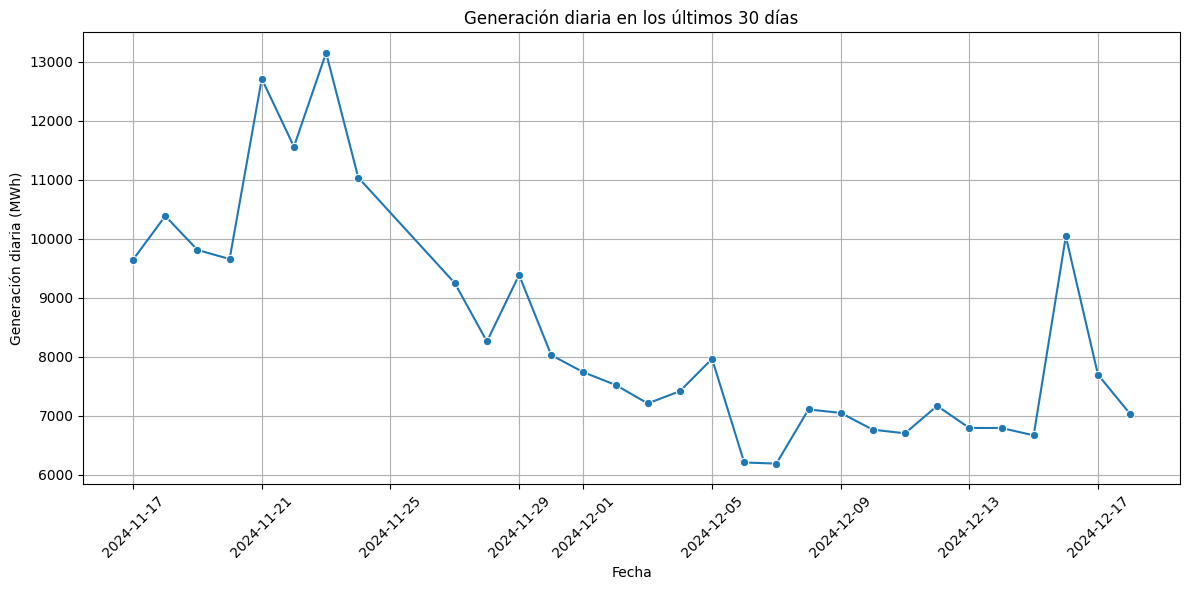

In [22]:
# Generación diaria de los últimos 30 días
last_30_days = data.sort_values('Date', ascending=False).head(30)
plt.figure(figsize=(12, 6))
sns.lineplot(data=last_30_days, x='Date', y='Daily_Generation', marker='o')
plt.title('Generación diaria en los últimos 30 días')
plt.xlabel('Fecha')
plt.ylabel('Generación diaria (MWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

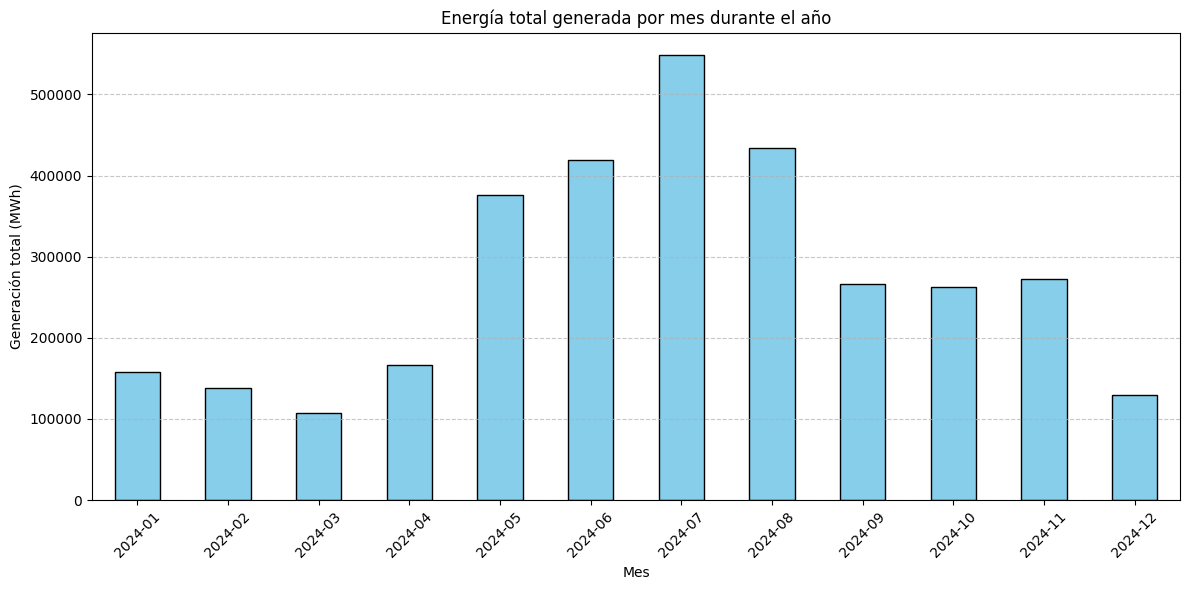

In [23]:
#Energía total generada por mes durante todo el año
monthly_generation = data.groupby('Month')['Daily_Generation'].sum()

plt.figure(figsize=(12, 6))
monthly_generation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Energía total generada por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Generación total (MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Análisis de generación por hora
hourly_means = data[hourly_columns].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_means.index, y=hourly_means.values, palette="viridis")
plt.title('Promedio de generación por hora (MWh)')
plt.xlabel('Hora del día')
plt.ylabel('Generación promedio (MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Horas con mayor y menor generación
max_hour = hourly_means.idxmax()
min_hour = hourly_means.idxmin()

print(f"Hora con mayor generación: {max_hour} ({hourly_means[max_hour]:.2f} MWh)")
print(f"Hora con menor generación: {min_hour} ({hourly_means[min_hour]:.2f} MWh)")

C:\Users\wilmar\AppData\Local\Temp\ipykernel_4544\2460071758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Daily_Generation', data=data, palette="Set3")


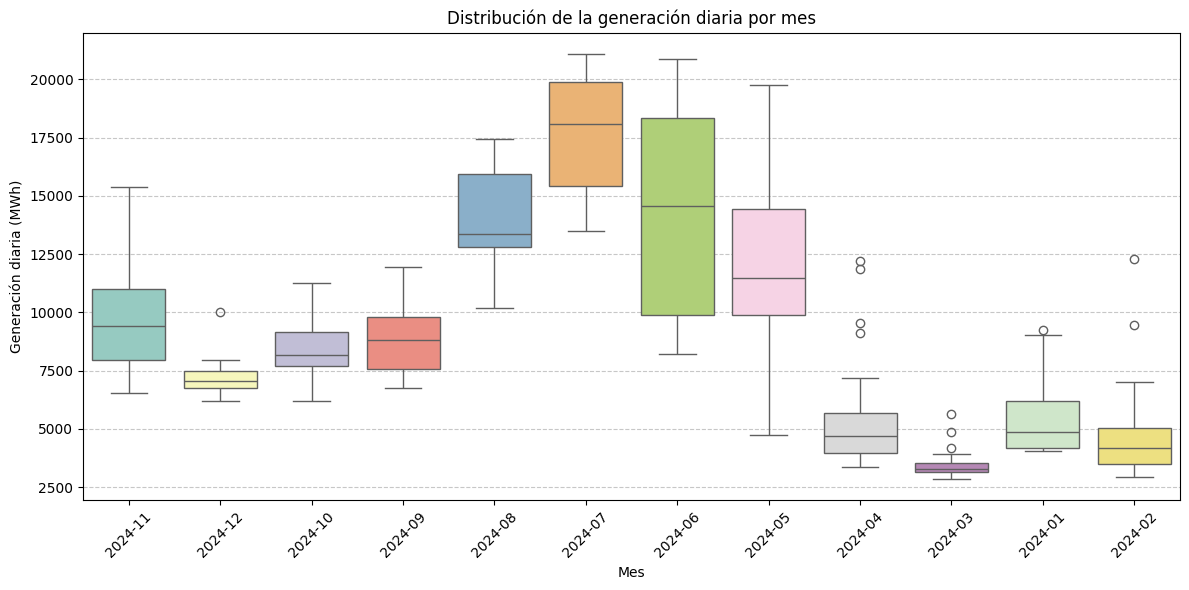

In [26]:
# Distribución de generación mensual
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Daily_Generation', data=data, palette="Set3")
plt.title('Distribución de la generación diaria por mes')
plt.xlabel('Mes')
plt.ylabel('Generación diaria (MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()